In [55]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [56]:
config_file= 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model= 'frozen_inference_graph.pb'

In [57]:
net = cv2.dnn_DetectionModel(config_file,frozen_model)

In [58]:
classLabels = []
file_name = 'coco.names'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [59]:
print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [60]:
print(len(classLabels))

91


In [61]:
net.setInputSize(360,360)
net.setInputScale(1.0/ 127.5)
net.setInputMean((127.5, 127.5, 127.5))
net.setInputSwapRB(True)

< cv2.dnn.Model 000002B013843270>

read an image


In [62]:
img = cv2.imread('WhatsApp Image 2024-10-17 at 10.25.55 AM.jpeg')


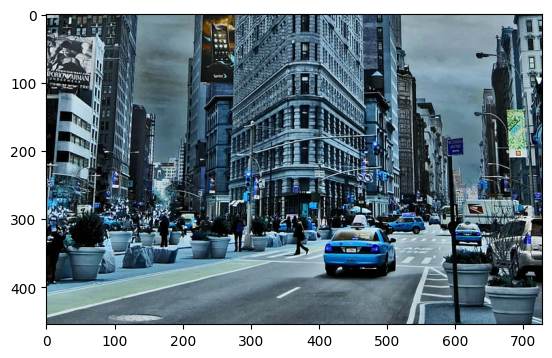

In [63]:
plt.imshow(img)

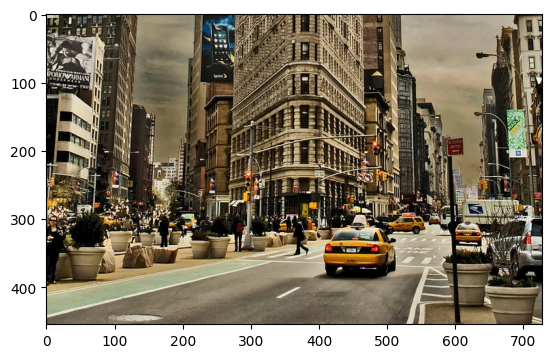

In [64]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [65]:
ClassIndex, confidece, bbox = net.detect(img,confThreshold=0.5)

In [66]:
print(ClassIndex)

[ 3  3 64  3  3  3  1 64  1  3 64  3  1  1  1 10  1  3 64 10 10  1 64  1
  3 10 10 64  3]


In [67]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip (ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes, (255,0,0), 2 )
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=3)

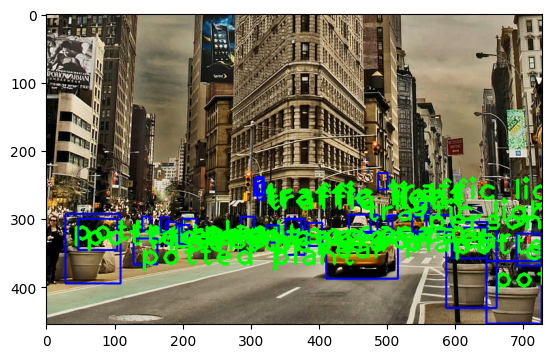

In [68]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [69]:
cap = cv2.VideoCapture('WhatsApp Video 2024-10-17 at 10.24.34 AM.mp4')


if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")


font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame= cap.read()

    ClassIndex, confidece, bbox = net.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf , boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes, (255,0,0), 2 )
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=3)

    cv2.imshow('Object Detection Tutorial',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destryAllWindows()

                
    
    
    

[31  1  1  1  1 28  1 28  1  1  1  1]
[31  1  1  1  1 28 28  1  1  1  1  1 10]
[31  1  1 28  1  1  1  1  1  1 10  1]
[ 1 31  1  1 28  1  1  1  1 28  1 10]
[31  1  1  1  1  1  1  1  1 28 10]
[ 1 31  1  1  1  1  1  1 28 10]
[ 1 31  1  1 28  1  1  1  1 28 10]
[ 1  1 31  1  1  1  1  1 10 28]
[ 1  1 31  1  1  1  1 10  1]
[31  1  1  1  1  1 28  1  1  1 10  1]
[31  1  1  1  1  1  1  1  1 10 28 28  1]
[ 1 31  1  1  1  1  1 28 10  1  1  1 28]
[31  1  1  1  1  1  1 28 28  1 10  1]
[ 1  1  1  1  1  1  1 10 28  1]
[ 1  1  1  1  1  1 28 10  1  1  1 28]
[ 1  1  1  1 28  1  1  1  1  1 10]
[ 1 28  1  1  1  1  1  1  1 10  1]
[28  1  1  1  1  1  1  1 28 10]
[ 1  1  1  1  1  1 28  1 10]
[ 1  1  1  1  1  1  1  1 28 10]
[ 1  1  1  1  1  1 10  1]
[ 1  1  1  1 28  1  1 10  1]
[ 1  1  1  1  1  1 28  1 10]
[ 1  1  1  1  1  1 28 10  1]
[ 1  1  1  1  1  1 10  1 31]
[ 1  1  1  1  1 31 28 27 10  1  1]
[ 1 31  1  1  1 28  1  1 10  1  1]
[ 1 31  1  1  1  1 28  1 10 27  1  1  1]
[ 1  1  1  1  1 31  1 28 10  1  1  1]


KeyboardInterrupt: 